In [1]:
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt

# import function from exercise 1
import Exercise_1 as ex1

<h1> Exercise 2: The Infinite Horizon Consumption Model

Consider again the simplest consumption-saving model but with an infinite time horizon:


$$\begin{align*}
    V_1(W_1) &= \max_{c_1,c_2,\dots} \{ \sqrt{c_1} +\beta \sqrt{c_2}+\beta^2\sqrt{c_3}+\cdots \} \\
    & \text{s.t.} \\
    W_{t+1} & = W_{t}-c_{t} \\
    c_{t} & \leq  W_{t}  \ \forall t\\
    c_{t} & \in  \mathbb{N}_0 \ \forall t
\end{align*}$$
for $\beta =0.9$ and $W_1=5$.



Notice, we can rewrite the first equation as a Bellman equation, with supressed time subscripts.

$$\begin{aligned}
    V(W) &= \max_{c \in \mathbb{N}_0, c \le W} \{\sqrt{c} +\beta V(\underbrace{W-c}_{W_{next}}) \}
\end{aligned}$$


### 1. Solve the model using Value Function Iteration (VFI): 

In [2]:
# 1. setup
beta = 0.9
W = 5

In [ ]:
# 2. allocate
grid_W = np.arange(W+1) # make a W+1 dimensional grid of possible cake sizes
Cstar = np.zeros([W+1]) + np.nan # make a W+1 dimensional grid of optimal consumption choices

In [7]:
# 3. parameters for VFI
max_iter = 200   # maximum number of iterations
delta = 1000 #difference between V_next and V_now (initial value is arbitrarily set to 1000)
tol = 10e-2 #convergence tolerance level
it = 0  #iteration counter 

V_now = np.zeros([W+1]) #arbitrary starting values (as 0)

# iterate
while (it <= max_iter and tol < delta): # stop if either max iterations reached or convergence achieved

    it = it+1
    V_next = V_now.copy()

    # loop over states
    for w_i in range(W+1):

        # FILL IN. Hint: Same idea as Exersice 1 with Backward Induction, but now without the time dimension

        ### SOLUTION ###
        c = np.arange(w_i+1)  # possible consumption choices given cake size w
        w_next = w_i - c # state transition
        V_search = np.sqrt(c) + beta*V_now[w_next] # search over values
        V_next[w_i] = np.amax(V_search)
        Cstar[w_i] = c[np.argmax(V_search)]
        ### SOLUTION ###
    
    delta = np.amax(np.abs(V_now - V_next)) # compute maximum difference between V_next and V_now

    # update V_now
    V_now = V_next.copy()

print(V_now)

[0.     1.     1.9    2.71   3.439  4.0951]


### 2. Fill in Exercise_2.py with a function with par as input. Par should contain $\beta$ and $W$. Solve the model for $\beta=0.9$ and $W=20$.

In [10]:
# Setup specifications in class. Defining a class is a neat way to access the parameters as attributes
class par: pass # define class with nothing in

# fill in class parameter values
par.beta = 0.90
par.W = 20
par.max_iter = 200   # maximum number of iterations
par.tol = 10e-2 #convergence tol. level

# check that the function works
from Exercise_2 import solve_VFI

sol = solve_VFI(par)
Cstar, V, _ = sol.C, sol.V, sol.it
Cstar

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 4.])

### 3. Plot the converged value function and make sure the value function is increasing in $W$.

Text(0.5, 1.0, 'Value function')

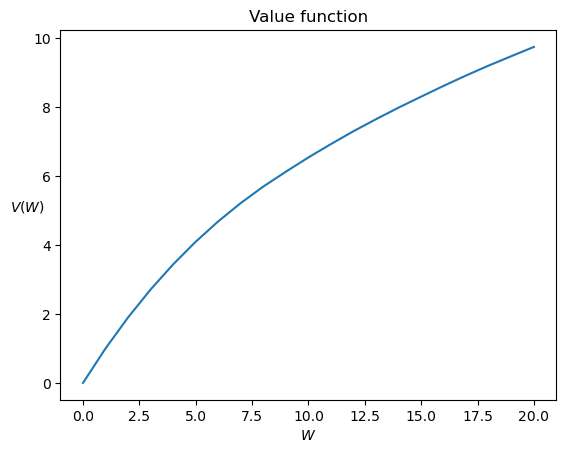

In [12]:
f, ax = plt.subplots()

ax.plot(np.arange(par.W+1),V)
ax.set_xlabel(f"$W$")
ax.set_ylabel(f"$V(W)$", rotation=0)
ax.set_title(f'Value function')

### 4. For $T=10$, $\beta=0.9$  and $W=20$ compare your solution using backward induction from exercise 1 with VFI. *How does the solutions differ?* 

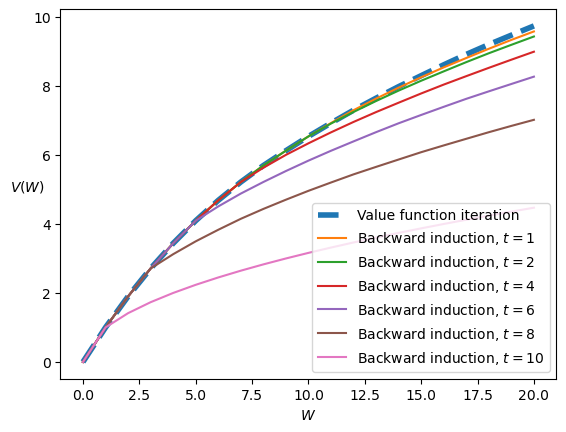

In [20]:
# add T to par
par.T = 10

# solve using Backward Induction from exercise 1
_,V_bi = ex1.solve_backwards(beta=par.beta,W=par.W,T=par.T) 

# make figure
f, ax = plt.subplots()
ax.plot(np.arange(par.W+1),V, label = f'Value function iteration', linestyle = 'dashed', linewidth=4)
for t in [0]+list(range(1,par.T,2)):
    ax.plot(np.arange(par.W+1),V_bi[:,t], label = f'Backward induction, $t = {t+1}$')
ax.set_xlabel(f"$W$")
ax.set_ylabel(f"$V(W)$", rotation=0);
ax.legend()

When $T$ increases in the backwards induction algorithm, the value function approaches the one for the infinite horizon. What is the intuition here?

### 5. Vary $\beta$ and check that the number of periods until convergence is increasing in $\beta$. *What is the reason for this lower convergence?*

In [21]:
beta_vec = [0.3,0.5,0.75, 0.80, 0.85, 0.90,0.93, 0.96]
it_vec = np.nan + np.zeros(len(beta_vec))
W = 20

for i,beta in enumerate(beta_vec):
    
    par.beta = beta

    # FILL IN. Hint: How can you extract the number of iterations till convergence with the output of solve_VFI()?

    ### SOLUTION ###
    sol =  solve_VFI(par) 
    it_vec[i] = sol.it
    ### SOLUTION ###

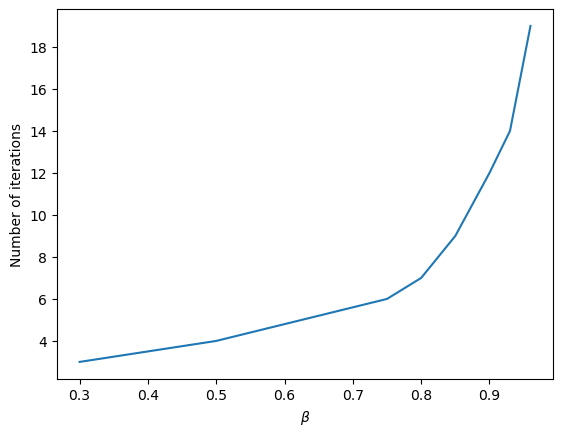

In [23]:
f, ax = plt.subplots()

ax.plot(beta_vec,it_vec)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel("Number of iterations");

### 6. Simulate $C_1$, $C_2$,...,$C_{10}$ using the policy function found in 2) and W=5
Model is infinite horizon but we simulate only $10$ periods

In [26]:
# solve the model using beta=0.90 and W=5 by fillin in par
par.beta = 0.90
par.W = 5

# call function
sol = solve_VFI(par)
Cstar, V, _ = sol.C, sol.V, sol.it

In [27]:
# define function for simulation
def simulate(Cstar,T,W):

    # 1. allocate memory
    C_sim = np.zeros(T)
    W_now = W

    # 2. simulate forwards
    for t in range(T-1):
        W_now = int(W_now)

        #FILL IN. Hint: similar to Exercise 1 simulation

        ### SOLUTION ###
        C_sim[t] = Cstar[W_now]
        W_now = W_now-C_sim[t]
        ### SOLUTION ###

    return C_sim

# 4. Simulate
W = 5 # initial cake size
T = 10 # number of simulated periods
C_sim = simulate(Cstar,T,W)  # Call function
        
print('Solution for C and W =', W , ': C =',C_sim)

Solution for C and W = 5 : C = [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
